### This notebook will leverage the Random Forest Regressor to evaluate the weather csv files

In [84]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import matplotlib.pyplot as plt

### Load and prepare data for evaluation

In [85]:
# read csv file into DataFrame
file = Path("philly_weather.csv")
df = pd.read_csv(file_path)
df.head()

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description
0,2012-10-01 13:00:00,71.0,1014.0,285.630000,270.0,4.0,broken clouds
1,2012-10-01 14:00:00,70.0,1014.0,285.663208,270.0,4.0,broken clouds
2,2012-10-01 15:00:00,70.0,1014.0,285.756824,271.0,3.0,broken clouds
3,2012-10-01 16:00:00,69.0,1014.0,285.850440,272.0,3.0,broken clouds
4,2012-10-01 17:00:00,69.0,1014.0,285.944057,274.0,3.0,broken clouds


In [86]:
# Drop "datetime" column
df.drop("datetime", axis=1, inplace=True)
df.head()

,humidity,pressure,temperature,wind-direction,wind-speed,weather-description
0,71.0,1014.0,285.630000,270.0,4.0,broken clouds
1,70.0,1014.0,285.663208,270.0,4.0,broken clouds
2,70.0,1014.0,285.756824,271.0,3.0,broken clouds
3,69.0,1014.0,285.850440,272.0,3.0,broken clouds
4,69.0,1014.0,285.944057,274.0,3.0,broken clouds


In [87]:
# Binary encode "weather-description" using Pandas (single column)
encoded_df = pd.get_dummies(df)
encoded_df.head()

,humidity,pressure,temperature,wind-direction,wind-speed,weather-description_broken clouds,weather-description_drizzle,weather-description_few clouds,weather-description_fog,weather-description_freezing rain,...,weather-description_sky is clear,weather-description_smoke,weather-description_snow,weather-description_squalls,weather-description_thunderstorm,weather-description_thunderstorm with heavy rain,weather-description_thunderstorm with light rain,weather-description_thunderstorm with rain,weather-description_very heavy rain,weather-description_volcanic ash
0,71.0,1014.0,285.630000,270.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,70.0,1014.0,285.663208,270.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.0,1014.0,285.756824,271.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69.0,1014.0,285.850440,272.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69.0,1014.0,285.944057,274.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Define features set
X = encoded_df.drop(columns = "temperature")
X.head()

,humidity,pressure,wind-direction,wind-speed,weather-description_broken clouds,weather-description_drizzle,weather-description_few clouds,weather-description_fog,weather-description_freezing rain,weather-description_haze,...,weather-description_sky is clear,weather-description_smoke,weather-description_snow,weather-description_squalls,weather-description_thunderstorm,weather-description_thunderstorm with heavy rain,weather-description_thunderstorm with light rain,weather-description_thunderstorm with rain,weather-description_very heavy rain,weather-description_volcanic ash
0,71.0,1014.0,270.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,70.0,1014.0,270.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.0,1014.0,271.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69.0,1014.0,272.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69.0,1014.0,274.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Define target vector
target = ["temperature"]
y = df.loc[:, target].copy()
y.head()

,temperature
0,285.630000
1,285.663208
2,285.756824
3,285.850440
4,285.944057


In [90]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Regressor

In [91]:
# Create the random forest regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [92]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)

### Evaluate model

In [93]:
train_score = rf_model.score(X_train_scaled, y_train)

test_score = rf_model.score(X_test_scaled, y_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"The score of the training data set is: {round(train_score, 4)}")
print(f"The score of the testing data set is: {round(test_score, 4)}")
print(f"The r2 score of testing data compared to the predicted data is: {round(r2, 4)}")
print(f"The mse of testing data compared to the predicted data is: {round(mse, 4)}")
print(f"The rmse of testing data compared to the predicted data is: {round(rmse, 4)}")

The score of the training data set is: 0.929
The score of the testing data set is: 0.4858
The r2 score of testing data compared to the predicted data is: 0.4858
The mse of testing data compared to the predicted data is: 53.5226
The rmse of testing data compared to the predicted data is: 7.3159


### Feature Importance

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

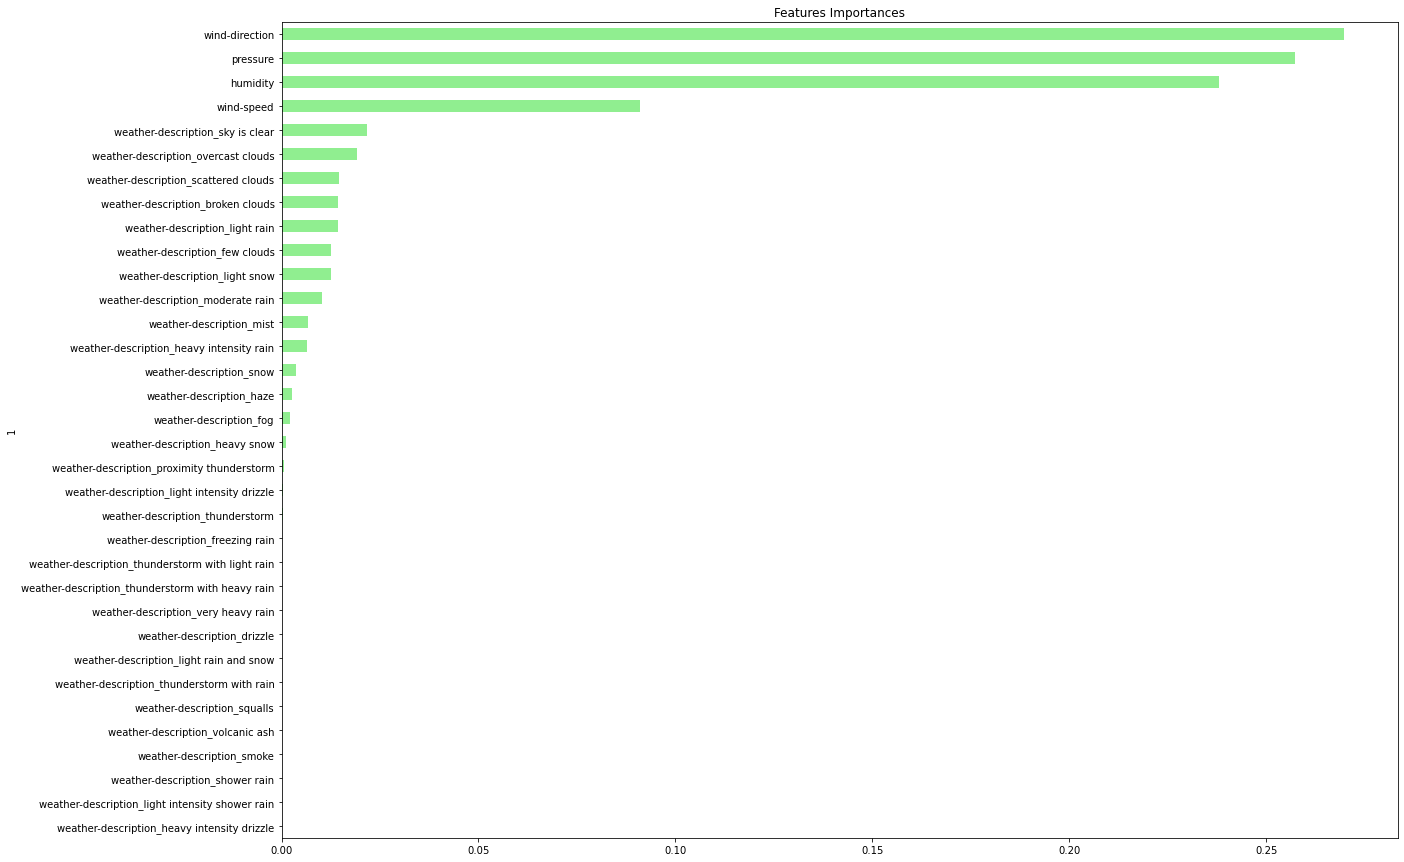

In [94]:
importances = rf_model.feature_importances_

# We can sort the features by their importance
importance_data = sorted(zip(importances, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(importance_data)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize =(20,15))

### Improving the model using RandomForestClassifier

In [95]:
 # Define a function that determines it rained or not by checking weather-description
rain_set = ['rain', 'drizzle', 'thunderstorm']
def contains_word(weather_type):
    if any(ele in weather_type for ele in rain_set):
        return 1
    else:
        return 0

In [101]:
# Create a new data frame with rain column
new_df = df.drop(columns = 'weather-description')
new_df['rain'] = np.nan

# Encode rain column by running 'contains_word' function over "weather-description column"
vals = []
for value in df['weather-description']:
    vals.append(contains_word(value))

new_df['rain'] = vals
new_df.head()

,humidity,pressure,temperature,wind-direction,wind-speed,rain
0,71.0,1014.0,285.630000,270.0,4.0,0
1,70.0,1014.0,285.663208,270.0,4.0,0
2,70.0,1014.0,285.756824,271.0,3.0,0
3,69.0,1014.0,285.850440,272.0,3.0,0
4,69.0,1014.0,285.944057,274.0,3.0,0


In [105]:
# Define features set
new_X = new_df.drop(columns = "rain")
new_X.head()

,humidity,pressure,temperature,wind-direction,wind-speed
0,71.0,1014.0,285.630000,270.0,4.0
1,70.0,1014.0,285.663208,270.0,4.0
2,70.0,1014.0,285.756824,271.0,3.0
3,69.0,1014.0,285.850440,272.0,3.0
4,69.0,1014.0,285.944057,274.0,3.0


In [106]:
# Define target vector
new_target = ["rain"]
new_y = new_df.loc[:, new_target].copy()
new_y.head()

,rain
0,0
1,0
2,0
3,0
4,0


In [107]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, random_state=15)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
# Create the random forest classifier instance
rfc_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rfc_model = rfc_model.fit(X_train_scaled, y_train)

In [110]:
# Making predictions using the testing data
new_y_pred = rfc_model.predict(X_test_scaled)

In [113]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, new_y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, new_y_pred)

In [114]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

print(f"Accuracy Score : {round(acc_score, 4)}")
print("Classification Report")
print(classification_report(y_test, new_y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,9127,230
Actual 1,1185,615


Accuracy Score : 0.8732
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9357
           1       0.73      0.34      0.47      1800

    accuracy                           0.87     11157
   macro avg       0.81      0.66      0.70     11157
weighted avg       0.86      0.87      0.85     11157



In [115]:
new_train_score = rfc_model.score(X_train_scaled, y_train)

new_test_score = rfc_model.score(X_test_scaled, y_test)

new_r2 = r2_score(y_test, new_y_pred)

new_mse = mean_squared_error(y_test, new_y_pred)

new_rmse = np.sqrt(new_mse)

print(f"The score of the new training data set is: {round(new_train_score, 4)}")
print(f"The score of the new testing data set is: {round(new_test_score, 4)}")
print(f"The r2 score of the new testing data compared to the new predicted data is: {round(new_r2, 4)}")
print(f"The mse of the new testing data compared to the new predicted data is: {round(new_mse, 4)}")
print(f"The rmse of the new testing data compared to the new predicted data is: {round(new_rmse, 4)}")

The score of the new training data set is: 0.9999
The score of the new testing data set is: 0.8732
The r2 score of the new testing data compared to the new predicted data is: 0.0627
The mse of the new testing data compared to the new predicted data is: 0.1268
The rmse of the new testing data compared to the new predicted data is: 0.3561
